In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from statsmodels import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [425]:
df = pd.read_csv('credit_card_default_analysis.csv', index_col='ID') #загрузка данных

In [426]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [427]:
df.info() #пропущеных значений нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [428]:
df.describe() #краткое описание статистик признаков

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [429]:
df.default.value_counts() 

0    23364
1     6636
Name: default, dtype: int64

* В данных кто вернул кредит (default = 0) приблизительно в 3 раза больше тех, кто его не вернул (default = 1)

## 1 . Размер кредитного лимита (в том числе и на семью клиента) LIMIT_BAL
### Визуализация


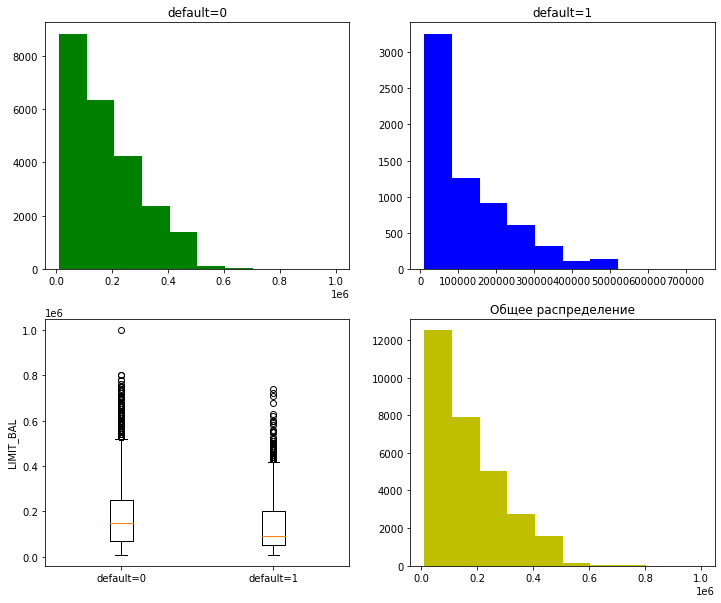

In [430]:
bal_0 = df[df['default']==0]['LIMIT_BAL']
bal_1 = df[df['default']==1]['LIMIT_BAL']
%matplotlib inline
fig, axs = plt.subplots(2, 2,figsize=(12,10))

axs[0, 0].hist(bal_0, color = 'g')
axs[0, 0].set_title('default=0')


axs[0, 1].hist(bal_1, color = 'b')
axs[0, 1].set_title('default=1')

axs[1, 0].boxplot([bal_0, bal_1])
axs[1, 0].set_xticklabels(['default=0', 'default=1'])
axs[1, 0].set_ylabel('LIMIT_BAL')

axs[1, 1].hist(df['LIMIT_BAL'], color = 'y')
axs[1, 1].set_title('Общее распределение')

plt.show()

### Интерпретация графиков
* Распределение признака скошенно с тяжелым правым хвостом и не является нормальным.


* На графиках ящиков с усами визуально видно, что медианы LIMIT_BAL немного отличаются в зависимости от значения целевой переменной.


* В зависимости от целевого признака распределения визуально отличаются




### a) проверка гипотезы о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

#### Точечная оценка разности медиан

In [431]:
print('Медиана признака по всему датасету ', np.median(df['LIMIT_BAL']))
print("Медиана при default=0: {} и при default=0: {}. Разность: {}".format(np.median(bal_0), 
                                                                           np.median(bal_1), 
                                                                           np.median(bal_0) - np.median(bal_1)))

Медиана признака по всему датасету  140000.0
Медиана при default=0: 150000.0 и при default=0: 90000.0. Разность: 60000.0


#### Интервальная оценка разности медиан

Поскольку выборка не сбалансированна относительно целевой переменной, то будем расчитывать интервал с помощью бутстрапа

In [432]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), size=(n_samples, len(data)))

    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [433]:
np.random.seed(0)

bal_0_scores = list(map(np.median, get_bootstrap_samples(np.array(bal_0), 1000)))
bal_1_scores = list(map(np.median, get_bootstrap_samples(np.array(bal_1), 1000)))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(bal_0_scores, bal_1_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [60000. 70000.]


* Интервал не включает 0. Это говорит о том что медианы скорее всего отличаются.

### b) проверка гипотезы о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних

Воспользуемся ранговым критерием **Манна-Уитни**:


$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$


$H_0$ : выборки имеют одинаковые распределения и средние не отличаются 

$H_1$ : Если справедлива альтернативная гипотеза и между распределениями действительно есть сдвиг, то средние значения признаков в выборках будут различаться.

In [434]:
print('Уровень значимости p = ', stats.mannwhitneyu(bal_0, bal_1)[1])

Уровень значимости p =  1.2255485818223303e-189


* Значение меньше порога 0.05 и нулевая гипотеза отвергается

Также воспользуемся **перестановочным критерием** 
$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$


$H_0$ : выборки имеют одинаковые распределения и средние не отличаются 

$H_1$ : Если справедлива альтернативная гипотеза и между распределениями действительно есть сдвиг, то средние значения признаков в выборках будут различаться.

In [435]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)



def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [436]:
print( 'Уровень значимости p = ', permutation_test(bal_0, bal_1, max_permutations = 10000))


Уровень значимости p =  0.0001


* Значение меньше порога 0.05 и нулевая гипотеза отвергается


**Практическая значимость**  В целом можно сделать вывод, что размер кредитного лимита меньше у клиентов с индикатором невозврата средств = 1. Из этого не следует что чем больше кредитный лимит тем больше вероятность возврата кредита. Из здравого смысла можно предположить, что кредитный лимит может уменьшаться(или не увеличивается в будущем), если клиент помечается флагом default=1

## 2 . Пол клиента (1 = мужской, 2 = женский ) SEX
### Визуализация



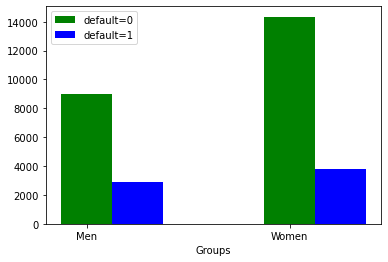

In [437]:
plt.bar(df[df['default']==0].SEX.value_counts().sort_index().index, 
        np.array(df[df['default']==0].SEX.value_counts().sort_index()),
       label = 'default=0',width=0.25 , color = 'g')
plt.bar(df[df['default']==1].SEX.value_counts().sort_index().index + 0.25, 
        np.array(df[df['default']==1].SEX.value_counts().sort_index()),
       label='default=1', width=0.25, color = 'b')
plt.xticks(df[df['default']==0].SEX.value_counts().sort_index().index, ['Men', 'Women'])
plt.xlabel("Groups")

plt.legend()
plt.show()



In [438]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

### Интерпретация графиков
* В данных клиентов мужского пола меньше чем женского


* Доля не вернувших больше среди мужчин.



### Проверка гипотезы о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается. 


Найдем доверительные интервалы для долей по отдельности

In [439]:
sex_0 = np.array(df[df['default']==0].SEX) - 1
sex_1 = np.array(df[df['default']==1].SEX) - 1
conf_interval_sex_0 = proportion_confint(sum(sex_0), 
                                            len(sex_0),
                                            method = 'wilson')

conf_interval_sex_1 = proportion_confint(sum(sex_1), 
                                            len(sex_1),
                                            method = 'wilson')
                                            
                                            
print('interval for proportion male/female for default=0 [%f, %f]' % conf_interval_sex_0)
print('interval for proportion male/female for default=1 [%f, %f]' % conf_interval_sex_1)

interval for proportion male/female for default=0 [0.607890, 0.620373]
interval for proportion male/female for default=1 [0.555102, 0.578938]


* Доверительные интервалы не пересекаются а значит доли могут отличаться

 
 Также найдем доверительный интервал для разности долей
 
 
 $H_0: p_1 = p_2$ различий между долями нет
 
 
 $H_1: p_1 != p_2$ доли отличаются

In [440]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [441]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(sex_0, sex_1))

confidence interval: [0.033635, 0.060548]


In [442]:
def proportions_diff_z_test(sample1, sample2, alternative = 'two-sided'):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        p_value =  2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        p_value = scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        p_value = 1 - scipy.stats.norm.cdf(z_stat)
    
    return "{:e}".format(p_value)

In [443]:
print("p-value: ", proportions_diff_z_test(sex_0, sex_1))

p-value:  4.472867e-12


* В интервал не входит 0, а значит доли невозврата отличаются в зависимости от пола


* Уровень значимости значительно ниже порога 0.05

## 3 . Образование EDUCATION
### Визуализация

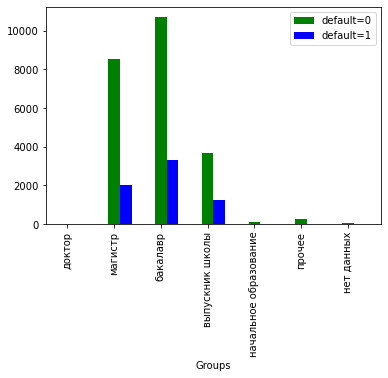

In [444]:
plt.bar(df[df['default']==0].EDUCATION.value_counts().sort_index().index, 
        np.array(df[df['default']==0].EDUCATION.value_counts().sort_index()),
       label = 'default=0', width=0.25, color = 'g' )
plt.bar(df[df['default']==1].EDUCATION.value_counts().sort_index().index+0.25, 
        np.array(df[df['default']==1].EDUCATION.value_counts().sort_index()),
       label='default=1', width=0.25, color = 'b')
plt.xticks(df[df['default']==0].EDUCATION.value_counts().sort_index().index, 
           ['доктор', 'магистр', 'бакалавр','выпускник школы',
            'начальное образование', 'прочее','нет данных'], rotation = 90)
plt.xlabel("Groups")

plt.legend()
plt.show()

### Таблица сопряженности

In [445]:
edu_crosstab = pd.crosstab(df['EDUCATION'], df['default']).reset_index(drop=True)
edu_crosstab['sum'] = edu_crosstab.sum(axis=1)
tot_row= edu_crosstab.sum().values.reshape(-1)
tot_rd = {0: tot_row[0], 1:tot_row[1], 'sum':tot_row[2]}
edu_crosstab = pd.concat([edu_crosstab, pd.DataFrame(tot_rd, index=[7])])
edu_crosstab = edu_crosstab.rename(index={0: 'доктор', 1: 'магистр', 2: 'бакалавр', 3:'выпускник школы',
                          4: 'начальное образование', 5: 'прочее', 6: 'нет данных', 7: 'sum'});
edu_crosstab

,0,1,sum
доктор,14,0,14
магистр,8549,2036,10585
бакалавр,10700,3330,14030
выпускник школы,3680,1237,4917
начальное образование,116,7,123
прочее,262,18,280
нет данных,43,8,51
sum,23364,6636,30000


### Доли не вернувших по категориям

In [447]:
edu_crosstab.loc[:, [0,1]].div(edu_crosstab["sum"], axis=0)[:-1]

,0,1
доктор,1.000000,0.000000
магистр,0.807652,0.192348
бакалавр,0.762651,0.237349
выпускник школы,0.748424,0.251576
начальное образование,0.943089,0.056911
прочее,0.935714,0.064286
нет данных,0.843137,0.156863


### Интерпретация графиков
* Основную часть кредитов выдают людям со средним образованием, бакалаврам и магистрам.
Остальные категории относительно не значительны


* Среди 3х самых многочисленных категорий можно сказать что процент возврата больше у магистров (80%) 
против бакалавров и выпускников школ (76% и 74%)


### Проверка гипотезы о том, что образование не влияет на то, вернет ли человек долг


Воспользуемся критерием $\chi^2$ для категориальных признаков
Наши данные отвечают критерию n ≥ 40. Кроме того, необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 ($(n.i\+ n_(+j))/n < 5$) не более, чем в 20% ячеек. (в таблице сопряженности таких ячеек нет)



$H_0$ : Уровень образования не влияет на целевую переменную возврата долга


$H_1$ : Влияет



Также посчитаем коэффициент V Крамера с помощью $\chi^2$ статистики.
Можно считать, что для категориальных признаков критерий $\chi^2$ проверяет гипотезу о равенстве нулю коэффициента V Крамера против альтернативы, что он нулю не равен


In [448]:
m = np.array(pd.crosstab(df['EDUCATION'], df['default']))
n = m.sum()
chi2, p, dof, ex = stats.chi2_contingency(m)
cramer = math.sqrt(chi2/(n*(min(7,2) - 1)))

In [449]:
print(f'Chi_2 статистика: {chi2} \nДостигаемый уровень значимости: {p} \nКоэффициент V Крамера: {cramer}')

Chi_2 статистика: 163.21655786997073 
Достигаемый уровень значимости: 1.2332626245415605e-32 
Коэффициент V Крамера: 0.07376009713252163


* р меньше порога 0.05. Нулевая гипотеза отвергается. Уровень образования влияет на возврат долга


* Коэффициента Крамера меняется от 0 до 1. Он не принимает значение 0, что говорит о зависимости возврата долга от образования

## 4. Семейное положение (MARRIAGE)
### Визуализация

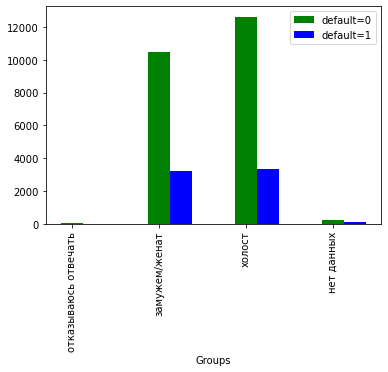

In [450]:
ax = plt.subplot(111)
ax.bar(df[df['default']==0].MARRIAGE.value_counts().sort_index().index, 
        np.array(df[df['default']==0].MARRIAGE.value_counts().sort_index()),
       label = 'default=0', width=0.25, color = 'g')
ax.bar(df[df['default']==1].MARRIAGE.value_counts().sort_index().index+0.25, 
        np.array(df[df['default']==1].MARRIAGE.value_counts().sort_index()),
       label='default=1', width=0.25, color = 'b')
plt.xticks(df.MARRIAGE.value_counts().sort_index().index, 
           ['отказываюсь отвечать','замужем/женат', 'холост','нет данных'], rotation = 90)
plt.xlabel("Groups")

ax.legend()
plt.show()

### Интерпретация графиков
* Основную часть кредитов выдают людям с семейным положением замужем/женат и холост. 
У незначительного числа заемщиков данные о семейном положении или отсутствуют или клиент отказался отвечать


* о разнице доли возвратов/невозвратов по категориям визуально сказать трудно



### Проверка, как связан семейный статус с индикатором дефолта

#### Таблица сопряженности

In [451]:
marriage_crosstab = pd.crosstab(df['MARRIAGE'], df['default'])
marriage_crosstab['sum'] = marriage_crosstab.sum(axis=1)
marriage_crosstab.reset_index(inplace=True, drop=True)
tot_row = marriage_crosstab.sum().values.reshape(-1)
tot_rd = {0: tot_row[0], 1:tot_row[1], 'sum':tot_row[2]}
marriage_crosstab = pd.concat([marriage_crosstab, pd.DataFrame(tot_rd, index=[4])])
marriage_crosstab = marriage_crosstab.rename(index={0: 'отказываюсь отвечать', 1: 'замужем/женат', 
                                                    2: 'холост', 3:'нет данных',
                                                   4: 'sum'});

In [452]:
marriage_crosstab.loc[:, [0,1]].div(marriage_crosstab["sum"], axis=0)[:-1]


,0,1
отказываюсь отвечать,0.907407,0.092593
замужем/женат,0.765283,0.234717
холост,0.790717,0.209283
нет данных,0.739938,0.260062


In [453]:
marriage_crosstab

,0,1,sum
отказываюсь отвечать,49,5,54
замужем/женат,10453,3206,13659
холост,12623,3341,15964
нет данных,239,84,323
sum,23364,6636,30000



Воспользуемся критерием $\chi^2$ для категориальных признаков
Все условия описанные ранее также выполняются по категории семейного положения



$H_0$ : Семейное не влияет на целевую переменную возврата долга


$H_1$ : Влияет



Также посчитаем коэффициент V Крамера с помощью $\chi^2$ статистики.
Можно считать, что для категориальных признаков критерий $\chi^2$ проверяет гипотезу о равенстве нулю коэффициента V Крамера против альтернативы, что он нулю не равен



In [454]:
m = np.array(pd.crosstab(df['MARRIAGE'], df['default']))
n = m.sum()
chi2, p, dof, ex = stats.chi2_contingency(m)
cramer = math.sqrt(chi2/(n*(min(7,2) - 1)))
print(f'Chi_2 статистика: {chi2} \nДостигаемый уровень значимости: {p} \nКоэффициент V Крамера: {cramer}')

Chi_2 статистика: 35.66239583433609 
Достигаемый уровень значимости: 8.825862457577375e-08 
Коэффициент V Крамера: 0.034478203662766466


* р меньше порога 0.05. Нулевая гипотеза отвергается. Семейное положение влияет на возврат долга


* Коэффициента Крамера меняется от 0 до 1. Он не принимает значение 0, что говорит о зависимости возврата долга от семейного положения

## 5. Возраст AGE
### Визуализация

In [455]:
age_0 = df[df['default']==0]['AGE']
age_1 = df[df['default']==1]['AGE']

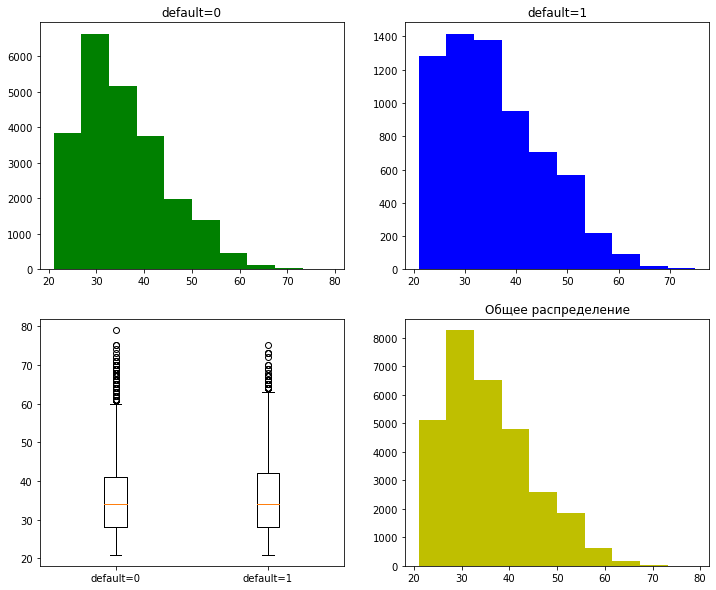

In [456]:
%matplotlib inline
fig, axs = plt.subplots(2, 2,figsize=(12,10))

axs[0, 0].hist(age_0, color = 'g')
axs[0, 0].set_title('default=0')


axs[0, 1].hist(age_1, color = 'b')
axs[0, 1].set_title('default=1')

axs[1, 0].boxplot([age_0, age_1])
axs[1, 0].set_xticklabels(['default=0', 'default=1'])

axs[1, 1].hist(df['AGE'], color = 'y')
axs[1, 1].set_title('Общее распределение')

plt.show()

### Интерпретация графиков
* Распределение признака скошенно с тяжелым правым хвостом и не является нормальным.


* На графиках ящиков с усами визуально видно, что медианы AGE не отличаются в зависимости от значения целевой переменной.


* В зависимости от целевого признака распределения визуально немного отличаются, но это различие скорее связано с тем что данных с целевым признаком равным 1 намного меньше 



 ### a) о равенстве медианных значений возрастов людей

#### Точечная оценка разности медиан

In [457]:
print('Медиана признака по всему датасету ', np.median(df['AGE']))
print("Медиана при default=0: {} и при default=0: {}. Разность: {}".format(np.median(age_0), 
                                                                           np.median(age_1), 
                                                                           np.median(age_0) - np.median(age_1)))

Медиана признака по всему датасету  34.0
Медиана при default=0: 34.0 и при default=0: 34.0. Разность: 0.0


#### Интервальная оценка разности медиан

In [459]:
np.random.seed(0)

age_0_scores = list(map(np.median, get_bootstrap_samples(np.array(age_0), 1000)))
age_1_scores = list(map(np.median, get_bootstrap_samples(np.array(age_1), 1000)))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(age_0_scores, age_1_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1.  0.]


* Интервал включает 0. Это говорит о том что медианы скорее не отличаются.



### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних

Воспользуемся ранговым критерием **Манна-Уитни**:


$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$


$H_0$ : выборки имеют одинаковые распределения и средние не отличаются 

$H_1$ : Если справедлива альтернативная гипотеза и между распределениями действительно есть сдвиг, то средние значения признаков в выборках будут различаться.

In [460]:
stats.mannwhitneyu(age_0, age_1)[1]

0.3725035434898616

* Значение больше порога 0.05 и нулевая гипотеза не отвергается

Также воспользуемся **перестановочным критерием** 
$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$


$H_0$ : выборки имеют одинаковые распределения и средние не отличаются 

$H_1$ : Если справедлива альтернативная гипотеза и между распределениями действительно есть сдвиг, то средние значения признаков в выборках будут различаться.

In [461]:
print( "p-value: %f" % permutation_test(age_0, age_1, max_permutations = 10000))



p-value: 0.017700


Значение меньше порога 0.05 и нулевая гипотеза отвергается


**Практическая значимость** С помощью интервальных оценок медианного возраста вернувших и не вернувших долг мы можем предположить, что целевая переменная может быть не сильно обусловлена возрастом.
С помощью критерия Манна-Уитни мы нашли еще одно подтверждение этого предположения.

Однако перестановочный критерий противоречит такому выводу и говорит, что возраст влияет на целевую переменную.